In [2]:
from PIL import Image
import matplotlib.pyplot as plt
from stardist import random_label_cmap
from skimage.measure import label
import numpy as np
cmap = random_label_cmap()

def create_size_mask(masks):
    size_masks = np.zeros_like(masks).astype(np.int64)
    for label in np.unique(masks)[1:]:
        bin_mask = (masks == label)
        mask_size = np.sum(bin_mask)
        size_masks += (bin_mask*mask_size)
    return size_masks

Text(0.5, 1.0, 'Omni pretrained')

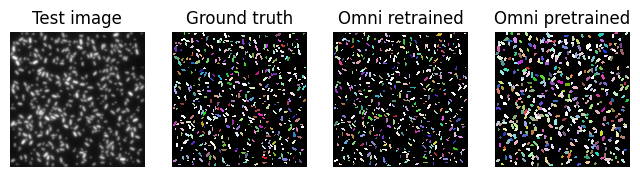

In [3]:
cells = np.array(Image.open("../Omnipose_pretrained_vs_retrained/test_data/0004.png"))
masks_syntrained = np.array(Image.open("../Omnipose_pretrained_vs_retrained/segmented_test_images/syntrained_4.png"))
masks_pretrained = np.array(Image.open("../Omnipose_pretrained_vs_retrained/segmented_test_images/pretrained_4.png"))
GT = np.array(Image.open("../Omnipose_pretrained_vs_retrained/test_data/0004_masks.png"))

fig, axs = plt.subplots(1, 4, figsize=(8,2))
for ax in axs:
    ax.set_axis_off()
axs[0].imshow(cells, cmap="Greys_r")
axs[1].imshow(GT, cmap=cmap, interpolation="none")
axs[2].imshow(masks_syntrained, cmap=cmap, interpolation="none")
axs[3].imshow(masks_pretrained, cmap=cmap, interpolation="none")

axs[0].set_title("Test image")
axs[1].set_title("Ground truth")
axs[2].set_title("Omni retrained")
axs[3].set_title("Omni pretrained")


Text(0.5, 1.0, 'Omni pretrained')

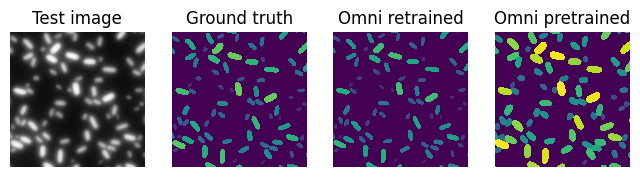

In [4]:
cells = np.array(Image.open("../Omnipose_pretrained_vs_retrained/test_data/0004.png"))

fig, axs = plt.subplots(1, 4, figsize=(8,2))
for ax in axs:
    ax.set_axis_off()

GT_size = create_size_mask(GT)[300:-300,300:-300]
masks_syntrained_size = create_size_mask(masks_syntrained)[300:-300,300:-300]
masks_pretrained_size = create_size_mask(masks_pretrained)[300:-300,300:-300]

vmin = np.min(np.concatenate([GT_size, masks_syntrained_size, masks_pretrained_size]))
vmax = np.max(np.concatenate([GT_size, masks_syntrained_size, masks_pretrained_size]))

axs[0].imshow(cells[300:-300,300:-300], cmap="Greys_r")
axs[1].imshow(GT_size, vmin=vmin, vmax=vmax, interpolation="none")
axs[2].imshow(masks_syntrained_size, vmin=vmin, vmax=vmax, interpolation="none")
axs[3].imshow(masks_pretrained_size, vmin=vmin, vmax=vmax, interpolation="none")

axs[0].set_title("Test image")
axs[1].set_title("Ground truth")
axs[2].set_title("Omni retrained")
axs[3].set_title("Omni pretrained")


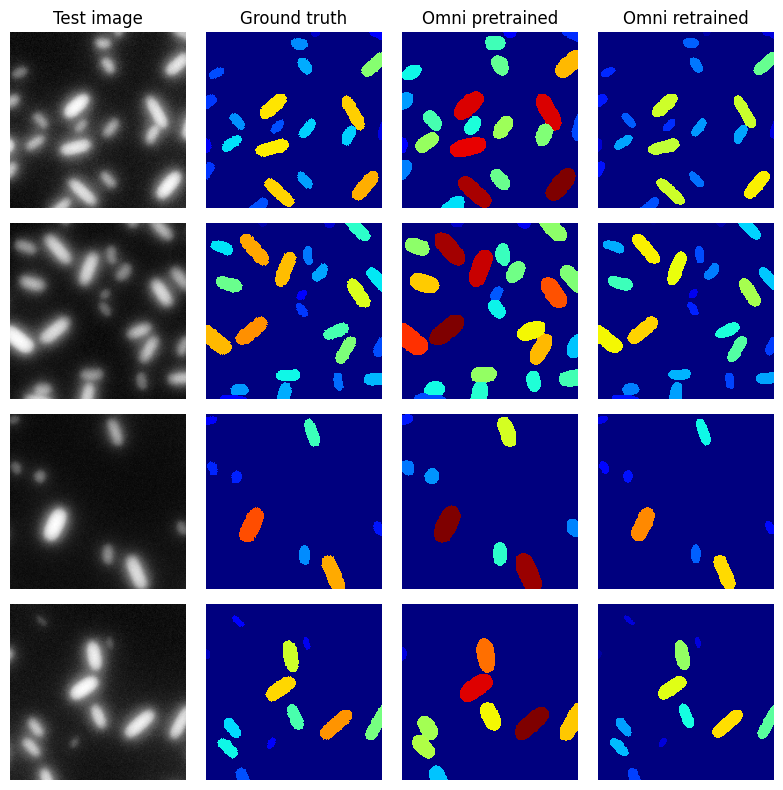

In [6]:
fig, axs = plt.subplots(4, 4, figsize=(8,8))
for i in range(4):
    cells = np.array(Image.open(f"../Omnipose_pretrained_vs_retrained/test_data/000{str(i*3)}.png"))[400:600,400:600]
    masks_syntrained = create_size_mask(np.array(Image.open(f"../Omnipose_pretrained_vs_retrained/segmented_test_images/syntrained_{str(i*3)}.png"))[400:600,400:600])
    masks_pretrained = create_size_mask(np.array(Image.open(f"../Omnipose_pretrained_vs_retrained/segmented_test_images/pretrained_{str(i*3)}.png"))[400:600,400:600])
    GT = create_size_mask(np.array(Image.open(f"../Omnipose_pretrained_vs_retrained/test_data/000{str(i*3)}_masks.png"))[400:600,400:600])

    
    vmin = np.min(np.concatenate([GT, masks_syntrained, masks_pretrained]))
    vmax = np.max(np.concatenate([GT, masks_syntrained, masks_pretrained]))



    axs[i,0].imshow(cells, cmap="Greys_r")
    axs[i,1].imshow(GT, vmin=vmin, vmax=vmax, cmap="jet", interpolation="none")
    axs[i,3].imshow(masks_syntrained, vmin=vmin, vmax=vmax, cmap="jet",interpolation="none")
    axs[i,2].imshow(masks_pretrained, vmin=vmin, vmax=vmax, cmap="jet",interpolation="none")

axs[0,0].set_title("Test image")
axs[0,1].set_title("Ground truth")
axs[0,3].set_title("Omni retrained")
axs[0,2].set_title("Omni pretrained")
for ax in axs.flatten():
    ax.set_axis_off()
plt.tight_layout()
plt.savefig("size_compare.svg")

In [ ]:
# flip membrane and cyto size plots in fig 3